<h1 style="display:none;">
<h1 style="display:none;">

# Introduction to Computing for Engineers and Computer Scientists<BR><BR>Built-In Types, Expressions, Operators, Testing, Control Flow


## Logistics

- I am meeting with the course assistants tomorrow. The CAs will post their office hours on Piazza in a day or two.


- I delayed the due date for HW1 to 30-Jan because of the setup problems, and the fact that I have not coordinated with the CAs.


- We seem to have two Piazza forums for the class. Please use the one linked from CourseWorks, which most of you seem to have been using. (piazza.com/columbia/spring2018/engie1006_001_2018_1introtocompforengappsci)


## Questions

### Limit on Numbers

After the last lecture:

- Student question
    -"Hey, Prof. You told us the biggest number in a computer is $2^{64}.$ 
    - The largest known prime number is  $2^{77,232,917} − 1$ (https://en.wikipedia.org/wiki/Largest_known_prime_number)
    - Presumably they used a computer to figure this out, how did that work?"


- Prof Answer: "From the Python 3 manual, 'The sys.maxint constant was removed, since there is no longer a limit to the value of integers.'" 


- Student: "Umm. How does that work?"


- Prof Answer: 

<img src="../images/L3_kid.jpeg">


#### Floating Point

In [49]:
import sys
print("The largest Python float possible on my system is ", sys.float_info.max)
print("The largest exponent for base 10 is  ", sys.float_info.max_10_exp)
print("Maximum number of digits of precision is ", sys.float_info.dig)


The largest Python float possible on my system is  1.7976931348623157e+308
The largest exponent for base 10 is   308
Maximum number of digits of precision is  15



<img src="../images/L3_IEEE_754.jpeg">

- 1.7976931348623157e+308 has has 308 decimal digits.


- $2^{1023} \approx 8.988465674312 \times 10^{307} \approx 0.8988465674312 \times 10^{308}$


- The 52-mantissa (in binary) is 1.111111 ... 111.
    - Binary $1.111111111111111111111111$ = $1.99999994039535522461$ decimal.
    - So, we get $(1.99999994039535522461 \times 0.8988465674312) \times 10^{308}  \approx 1.797693081287 \times 10^{308}$


#### Integers

- Since we have 64 bits, it seems the largest integer could be $2^{63}$ with 1 bit for sign.


- This is pretty big, but ...
    - "The sys.maxint constant was removed, since there is no longer a limit to the value of integers." (https://docs.python.org/3/whatsnew/3.0.html) 
    - The largest known prime number is  $2^{77,232,917} − 1,$ which has 23,249,425 digits.


- How does this work?
    - Python, and other languages' libraries, do not use the built-in hardware for very large numbers.
    - The libraries do it symbolically using software.


- $2^{64} \approx 1.844674407371\times10^{19}$, which has 20 digits.


- What is the sum of the following 25 digit numbers?
<br><br>
\begin{equation}
1234567890123456789012345 + 10987654321098765432109875
\end{equation}


- You could do this with a pencil and piece of paper, by basically following a "program" you learned in school.


- The computer treats very large integers as an array of digits and follows an algorithm similar to what you learned in school.

In [2]:
# This module supports addition of large, positive integers.
# An example is
# 1234567890123456789012345 + 10987654321098765432109875
# Both operands are larger than sys.maxsize = 9223372036854775807,
# which is the largest integer the system can represent in 64 bits.
#
# The module symbolically does the addition they way students
# learn in in school. The integer input is a text string of digits.
#
# The module expands each operand to a list of digits, and then adds
# one position at a time, with support for carry.
#

# Input is a string of the form "109876"
# Output is an array of the form [1, 0, 9, 8, 7, 6]
# NOTE: The function should, but does not check for bad input like
# non-digits.
#
def num_str_to_digits(num):
    # Hold the result.
    digits = []
    
    # Loop through each character in the string.
    for char in num:
        # Convert the character in the position, e.g. '3'
        # To the integer it represents, e.g. 3
        # And append to the array
        digits.append( int(char) )
        
    # return the result
    return digits

# Reverse of num_str_to_digits.
# Takes an input of the form [1, 2, 3, 7]
# Returns "1237"
#
def digits_to_num_str(d):
    # map the str(x) function to each element in the list
    # The map converts [1, 2, 3, 7] to ["1", "2", "3", "7"]
    # Then return a string which is the elements "joined"
    s = "".join(map(str,d))
    return s

# The input is an array of digits and a position.
# The position is the 10^i digit in the list representation
# of the number, e.g. if i is 3 and num is [1, 2, 3, 4, 5] the
# result is 2. If i is 0, the result is 5.
#
# If the 10s position is higher than the numer of digits, return 0
#
def get_digit_from_list(num, i):
    result = 0
    
    # Length of the list. Also means that the highest 10s position
    # is 10**(len - 1)
    #
    length = len(num)
    
    # We need to start at the end. So, the zero position is -1,
    # the 10s position is -2, ... We also need to check if the 10s
    # position is to larger.
    i = i + 1
    if i > length:
        result = 0
    else:
        result = num[-1 * i]
        
    # Return result.
    return result


# Perform symbolic addition.
# Input is two lists of integers symbolically representing a number.
# For example, [1, 2, 0, 9] represents "1209"
# The result is a symbolic representation of the sum. For example
# [1, 2, 3, 4] + [9, 1, 1, 1] is [1,0,3,4,5]
#
def add_num_arrays(n1, n2):
    
    # Get length of the longest number. Addition needs to
    # process every decimal place.
    max_len = max(len(n1), len(n2))
    
    # Placeholder for result.
    result = []
    
    # Represents the 10s position we are adding, and starts at 0
    i = 0
    # Do we have to carry the 1 to the next position.
    carry = 0
    
    # Loop and examine every digit.
    while i < max_len:
        
        # Get the 10**i digit from each number.
        d1 = get_digit_from_list(n1, i)
        d2 = get_digit_from_list(n2, i)
        #print("The two digits are ", d1, ", ", d2)
        
        # Next pass through the loop will examine 10**(i+1)
        # if one of the numbers is big enough
        i = i + 1
        
        # The result value for 10**i is the sum of the two
        # digits plus anything carried.
        new_digit = d1 + d2 + carry
        
        # If the digit is larger than 10, subtract 10 and carry 1
        if new_digit >= 10:
            carry = 1
            new_digit = new_digit - 10
        else:
            carry = 0
        
        # Add the digit to the result at the beginning. We compute the
        # result going right to left.
        result.insert(0,new_digit)
        
    # When we have processed all digits, if we still have a carry,
    # then we add a 1 at the beginning.
    if carry == 1:
        result.insert(0,1)
        
    return result


# This code below would be in a separate file that we use to test the module above.
# Just easiest to put here for now.
#
num1 = "1234567890123456789012345"
num2 = "10987654321098765432109875"
num3 = "8234"
num4 = "1906"

dig1 = None
dig2 = None
dig3 = None
    
def test_digits_to_num_str(d):
    s = digits_to_num_str(d)
    print("Coverting ", d, "to a num string is ", s)
    
def test_string_to_array():
    global dig1
    global dig2
    global dig3
    dig1 = num_str_to_digits(num1)
    print("dig1 = ", dig1)
    dig2 = num_str_to_digits(num2)
    print("dig2 = ", dig2)
    dig3 = num_str_to_digits(num3)
    print("dig3 = ", dig3)

def test_get_digit_from_list():
    exp = 0
    print("10 to ", exp, " place digit for ", dig3, " is ", get_digit_from_list(dig3, exp))
    exp = 3
    print("10 to ", exp, " place digit for ", dig3, " is ", get_digit_from_list(dig3, exp))
    exp = 25
    print("10 to ", exp, " place digit for ", dig3, " is ", get_digit_from_list(dig3, exp))
    
test_string_to_array()
test_get_digit_from_list()

dig1 = num_str_to_digits(num1)
dig2 = num_str_to_digits(num2)

test_digits_to_num_str(dig1)

dig3 = num_str_to_digits(num3)
dig4 = num_str_to_digits(num4)

r = add_num_arrays(dig3, dig4)
r = digits_to_num_str(r)
print (num3, " + ", num4, " = ", r)

r = add_num_arrays(dig1, dig2)
r = digits_to_num_str(r)
print (num1, " + ", num2, " = ", r)



dig1 =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5]
dig2 =  [1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 9, 8, 7, 5]
dig3 =  [8, 2, 3, 4]
10 to  0  place digit for  [8, 2, 3, 4]  is  4
10 to  3  place digit for  [8, 2, 3, 4]  is  8
10 to  25  place digit for  [8, 2, 3, 4]  is  0
Coverting  [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5] to a num string is  1234567890123456789012345
8234  +  1906  =  10140
1234567890123456789012345  +  10987654321098765432109875  =  12222222211222222221122220


#### Comments

- We just implemented a simple _algorithm._


- We also learned our first principle of software engineering $-$ [decomposition](https://en.wikipedia.org/wiki/Decomposition_(computer_science):
    - Do not write one large program implementing all aspects of an algorithm.
    - Break the algorithm into sub-algorithms, e.g. "How do I get the 10<sup>i</sup> position digit.
    - Implement and test each smaller algorithm.
    - Combine the smaller pieces into a solution.
    
    
- Decomposition
    - Produces more reliable software by complying with [bounded rationality](https://en.wikipedia.org/wiki/Bounded_rationality)
    - Improves productivity by enabling subteams to work in parallel on subproblems.
    - Produces resuable code and modules that may apply to other solutions.
    
    
- A complete solution would have to implement the additional integer operators
    - $- $ is obvious
    - $p \times q,$ but multiplcation is just repetitive addition.
    - $p \div q,$ but division is just a form of multiplication.
    - Boolean operators $ =, \lt, \le, \gt, \ge.$ How to do this should be clear. We just compare the individual digits and length instead of adding.
    
    
- You can extend the approach to floating point numbers.


- Libraries that perform these function have optimizations. The implementation above is simple and naive.


- Python uses hardware representation for small enough integers, but automatically converts to array like representations for larger integers.


- There are libraries that do infinite precision math for integers and floats, e.g. http://mpmath.org/


- __Net:__ 
    - Programs can symbolically implement math in software for very large numbers.
    - The only practical limit is the total number of available memory bytes for numbers.
    - The approach is significantly slower than direct implementation in hardware. Simplistically, 1 + 3 = 3
        - is one clock cycle if done in HW.
        - Billions of clock cycles if done in SW.
        
        
- I will explain HW arithmetic in a future lecture, but we have to learn more Python right now.
        
    

## Python Built-In Types

### Overview

<img src="../images/ptypes.jpeg">

<br><br>


### Numeric Types

- Numeric types are straight forward and are what you expect.


- There are a bunch of operators and functions, which we will cover later.


- There is a very powerful built-in math library, and some even more powerful optional packages.


- Some examples:

In [51]:
import math

x = 4
y = 3.1416
z = complex(x,y)
c = 1+2j

print("Some basic objects:")
print("x = ", x)
print("y = ", y)
print("z = ", z)
print("c = ", c)
print("\nResult of operations on objects.")
print("z + c \t = ", z+c)
print("x + y \t = ", x + y)
print("x * c \t = ", x*c)
print("\nResult of some more operations on objects.")
print("The real part of z is ", z.real)
print("The imaginary part of z  is ", z.imag)
print("The integer part of y is ", int(y))
print("I can also compute the ceiling of y, which is ", math.ceil(y))
print("x / y = ", x / y)
print("x // y =", x //y)




Some basic objects:
x =  4
y =  3.1416
z =  (4+3.1416j)
c =  (1+2j)

Result of operations on objects.
z + c 	 =  (5+5.1416j)
x + y 	 =  7.1416
x * c 	 =  (4+8j)

Result of some more operations on objects.
The real part of z is  4.0
The imaginary part of z  is  3.1416
The integer part of y is  3
I can also compute the ceiling of y, which is  4
x / y =  1.2732365673542145
x // y = 1.0


- Representing numberic types
    - int/Integer has 4 representations in Python
        - Decimal: 
            - Digits are 0,1,2,3,4,5,6,7,8,9
            - Examples are: 0, 231, 3978
        - [Hexadecimal](https://en.wikipedia.org/wiki/Hexadecimal):
            - Digits are 0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F
            - Examples:
                - 0x23 =  (2 * 16) + 3 = 35
                - 0xFA2 = (15 * (16 * 16) + (10 * 16) + 2  = 4002
        - [Octal](https://en.wikipedia.org/wiki/Octal)
            - Digits are 0,1,2,3,4,5,6,7
            - Examples:
                - 0o21 = (2 * 8) + 1 = 17
                - 0o1001 = 513
        - [Binary](https://en.wikipedia.org/wiki/Binary_number):
            - Digits are 0,1
            - Examples:
                - 0b11 = (1 * 2) + 1 = 3
                -0b1000 = 8
    - A real number has two representations
        - [Floating point decimal](https://en.wikipedia.org/wiki/Decimal_floating_point):
            - Format is (decimal int).(decimal int)
            - Examples:
                - 3.1416
                - 2.7813
                - 1.1414
        - [Exponential notation](https://en.wikipedia.org/wiki/Scientific_notation): Also known as scientific notation
            - Format is (floating point)e(int)
            - Examples:
                -  21e3 = 21000
                - 0.000213e3 = 0.213
        - [Complex](https://en.wikipedia.org/wiki/Complex_number):
            - Format is (floating point)+(floating point)j
            - Examples:
                -  2.1718+3.1416j = (2.1718+3.1416j)
                - complex(3,21.3) = (3+21.3j)
          
          
- Limits
    - Numbers in the real world can be -infinity to infinity, and have infinite number of decimal places.
    - The basic types (classes) in Python have upper and lower bounds.
    - There are modules that support increased limits and precision.
    
<img src="../images/floatinfo.jpeg">


- Rounding errors
    - In base 10, there is no decimal representation for irrational numbers, e.g. 1/3 or sqrt(2).
    - Some numbers are irrational in base 2, which is what a computer uses, e.g. 0.1 <br>So, (0.1 + 0.1 + 0.1) = 0.30000000000000004, and does not equal 0.3
    - This can break some fundamental laws of mathematics (algebra), e.g.
        - math.sqrt(2) * math.sqrt(2) = 2.0000000000000004 and not 2.
        -  0.3 - 0.1 - 0.1 - 0.1 = -2.7755575615628914e-17, not 0
        - (a + b) + c may or may not equal a + (b + c)
    - This is a behavior of ALL computers and programming languages.
    - In Python, you can handle with round()
        - 0.1 + 0.1 + 0.1 does not equal 0.3
        - round(0.1 + 0.1 + 0.1) DOES equal 0.3
        

### Sequency Types

#### Overview and Text Sequences

<img src="../images/textsequence.jpeg">

The object type _str_, or text sequence, is an example of the basic sequence pattern
- There is an object of type "sequence." 


- In the example, the name of the object is _t_


- The object _t_ is itself made up of an iterable sequence of objects. The name of each object is logically  _t[i]_, e.g.
    - t[0]
    - t[1]
    - t[2]
    - ... ...
    

- A text sequence/str is simply a sequence in which each t[i] is a "text character."


- Remember,
    - In a computer, everything is a binary number.
    - For text and characters, the _encoding_ determines the mapping from integer value to printable character value.
    - [ASCII](https://en.wikipedia.org/wiki/ASCII) (American Standard Code for Information Interchange) used to be very common, but was "American" centric.
        - An ASCII only encodes 127 characters, and comes from the teletype days.
        - ASCII does support non-English characters.
    - IBM and some other systems used [Extended Binary Coded Decimal Interchange Code (EBCIDIC)](https://en.wikipedia.org/wiki/EBCDIC) for a long time.  
    - [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is now the most common encoding.
        - UTF-8 encodes 1,112,064 characters from [Unicode](https://en.wikipedia.org/wiki/Unicode).
        - The first 127 numbers of ASCII and UTF-8 represent the same characters, that is UTF-8 is a superset of ASCII.
    
<img src="../images/encodinggrowth.jpeg">

_Some initial fun with encodings_
<br><br>

In [52]:
print("UTF (unicode) character number 20516 is = ", chr(20516))
print("There is no way to do this because ASCII is 1 byte and is 0 to 255")
print("ASCII is perfectly OK with 85 representing ", chr(85))

UTF (unicode) character number 20516 is =  値
There is no way to do this because ASCII is 1 byte and is 0 to 255
ASCII is perfectly OK with 85 representing  U


<br>
_Some function with text sequences (strings)_
<br>

In [53]:
mm = "A simple string"

# An sequence of bytes, which must be 0 .. 255
bb = bytes([87, 9, 88, 32, 89])
# A sequence of integers.
tt = [87, 9, 88, 32, 89, 20516, 1023]

print("\n")
print("mm = ", mm)
print("mm as a byte sequence = ", bytes(mm,"ascii"))
print("\n")
print("bb as a byte array = ", bb)
print('bb as a string = ', bb.decode("ascii"))
print('bb as a UTF string = ', bb.decode("utf8"))
print("\n")
print("Let's access parts of things.")
print("The fourth thing in mm is mm[3] which is ", mm[3])
print('bb as a string = ', bb.decode("ascii"), " and the fourth byte is ", bb[3])
print('bb as a string = ', bb.decode("ascii"), " and the second byte is ", bb[1])
print("bb[1] is the integer ", bb[1], " which is the tab character." )

print("\nNow some fun with sequence of integers")
print("tt = ", tt)
print("Let's try converting tt to a string. str(tt) = ", str(tt))
print("I got a string representation of the list.")
print("How about a string (text sequence) which converted each int to a UTF-8 chr?")
print("The answer is ''.join(map(chr,tt))", ''.join(map(chr,tt)), "\nand we will understand later.")



mm =  A simple string
mm as a byte sequence =  b'A simple string'


bb as a byte array =  b'W\tX Y'
bb as a string =  W	X Y
bb as a UTF string =  W	X Y


Let's access parts of things.
The fourth thing in mm is mm[3] which is  i
bb as a string =  W	X Y  and the fourth byte is  32
bb as a string =  W	X Y  and the second byte is  9
bb[1] is the integer  9  which is the tab character.

Now some fun with sequence of integers
tt =  [87, 9, 88, 32, 89, 20516, 1023]
Let's try converting tt to a string. str(tt) =  [87, 9, 88, 32, 89, 20516, 1023]
I got a string representation of the list.
How about a string (text sequence) which converted each int to a UTF-8 chr?
The answer is ''.join(map(chr,tt)) W	X Y値Ͽ 
and we will understand later.


#### Mutable and Immutable

"In object-oriented and functional programming, an _immutable object_ (unchangeable object) is an object whose state cannot be modified after it is created. This is in contrast to a _mutable object_ (changeable object), which can be modified after it is created." (https://en.wikipedia.org/wiki/Immutable_object)

- Most simple objects are immutable
    - You cannot change the integer 10 to 11, 12.37 or "Hello."
    - In the same way you cannot change 217345 to 341167, you cannot change "Hello" to "Halo."


- You can
    - Change what instance names reference.
    - Make new instances using parts of immutable objects.
    - etc.
    

- Mutability
    - Is an important concept, and its importance will become clear in future lectures.
    - We will not focus on the concept in the early lectures or projects, but you may occasionally hit find something that you think should work, but does not.



In [54]:
s = "Hello"
print ("s = ", s)

s2 = s[0] + "a" + s[3:5]
print("s2 = ", s2)

s =  Hello
s2 =  Halo


In [55]:
s[1]='a'

TypeError: 'str' object does not support item assignment

#### byte, bytearray, memoryview

- _Byte_ is the most basic unit of computer memory.
    - A byte is 8 bits (0/1 digits)
    - Decimal 0 to 255.
    - Binary 00000000 to 11111111
    - Hexadecimal 00,01, ... 09,0A, ..., OF, 10, 11, ..., 1F, ... FF.
        - A hex digit is 0 to F, which is 16 --> 4 bits.
        - A byte is 8 bits, or two hex digits.
        
        
- byte is immutable. byte_array _is_ mutable


- We will worry about _memoryview_ later

In [ ]:
x = b'El ni\xc3\xb1o come camar\xc3\xb3n'
print("x = ",x)
print("\nx.decode('utf-8)') = ",x.decode("utf-8"))
print("\nx to int big endian = ", int.from_bytes(x,  byteorder='big'))
print("\nx to int big endian = ", int.from_bytes(x,  byteorder='little'))

y = bytearray(x)
print("\ny = bytearray(c) produces y =", y)
print("\nn ASCII is the integer ", ord('n'))
y[5]=ord('n')
y[6]=ord('o')
y[7]=ord(' ')
print("I can change a bytearray. y[5]= the into ASCIii n, y[6] to ASCII o and y[7] to ASCII <space>, \nproduces y = ", y)
print("")

- 'enye' requires two bytes
    - I turned the first byte into 'n'
    - And the second by to < space >
- Why/when would you use _byte_, _bytearray_ and _memoryview?_
    - Integer, float, string, ... are by far the most common. Most of our projects will use these basic types and the other sequence types (below).
    - In many more advanced applications, you have to manipulate raw bytes, e.g.
        - Image, audio, etc. processing.
        - Cryptography
        - Signal processing
        
        

<img src="../images/jpeghex.jpeg">

#### Lists, Sets, Maps

"Lists are mutable sequences, typically used to store collections of homogeneous items (where the precise degree of similarity will vary by application)." (https://docs.python.org/3/library/stdtypes.html#list)

Many other languages use the term "array" for the language's similar concept.

__A simple example__


In [ ]:
x = [1, 10, 3.1416+2.7318j, "Hello", b'El ni\xc3\xb1o come camar\xc3\xb3n']
print("\nWhat is 'similar' about the elements of ", x, "?")
print("All are examples of built-in types used in the lecture")

__List are mutable__

In [ ]:
x = [1, 10, 3.1416+2.7318j, "Hello", b'El ni\xc3\xb1o come camar\xc3\xb3n']
print("\nx starts out as = ", x)
x[1]=bytes("Canary".encode("UTF-8"))
print("\nx becomes = ", x)

y = ["foo", 2e9]
print("\ny = ", y)

y = x + y
print("\ny becomes = ", y)
del(y[1])
print("\ny becomes = ", y)


__Lists are fundamental of data, analytics and plotting__


Vector a =  [1 3]
Vector b =  [5 2]

The inner product of a and b is =  11

The sum of a + b is the vector  [6 5]


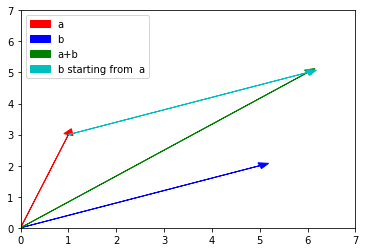

In [4]:
import numpy as np 
import matplotlib.pyplot as plt


a = np.array([1,3]) 
print("\nVector a = ", a)
b = np.array([5,2])
print("Vector b = ", b)

print("\nThe inner product of a and b is = ", np.inner(a,b))

ad = np.add(a,b)
print("\nThe sum of a + b is the vector ", ad)

ax = plt.axes()
plt.axis([0, 7, 0, 7])
l1 = ax.arrow(0,0,a[0],a[1], color='r', label="a",head_width=0.2, head_length=0.2)
l2 = ax.arrow(0,0, b[0],b[1], color='b', label="b",head_width=0.2, head_length=0.2)
l3 = ax.arrow(0,0,ad[0],ad[1], color='g', label="a+b",head_width=0.2, head_length=0.2)
l4 = ax.arrow(a[0],a[1],(ad[0]-a[0]),(ad[1]-a[1]),head_width=0.2, head_length=0.2,color='c',label="b starting from  a")
legend = ax.legend(handles=[l1,l2, l3, l4],loc='upper left')

plt.show() 

### Homework 1, Part B

- Due date, points and full description are on [CourseWorks](https://courseworks2.columbia.edu/courses/53496/assignments/134478)


- Build a Jupyter notebook with the name "< uni >_assignment_2"
    

- Add the Python code from Assignment 1, Part A to a code cell in the Jupyter notebook.


- Build your UNI
    - Create a Code cell in the notebook. Use python statements like a=23 or b="foo".
    - Assign the names last_name, first_name, middle_name to the string values for your last, first and middle names.
    - The prefix of your UNI is some combination of the first character of the name string. For example, my full name is "Donald Francis Ferguson" and my UNI prefix is "dff".
    - The suffix of the UNI is a number. Assign the name uni_suffix to the integer number in your UNI. Mine would be the integer 9.
    - Using modifications from the code in lecture 1 and 2, create a string reprentation of your UNI and print it.
    - Uppercase letters are fine, e.g. "DFF9" is a correct submission.
    
- List
    - Create a list that contains your first name, middle name, last name and UNI.
    - Remove your middle name from the list.
    - Move the UNI to the first element in the list.
    
    

## Operators

### Overview

References:
- Punch and Embody, section 1.7.
- [tutorialspoint](https://www.tutorialspoint.com/python/python_basic_operators.htm) is also a good overview and tutorial.

[Definitions:]() "_Operators_ are special symbols in Python that carry out arithmetic or logical computation. The value(s) that the operator operates on is called the _operand(s)_.

Example: 4 + 5 == 9 versus 4 + 5 = 9
- 4 + 5 == 9
    - Has three operands: 4,5,9
    - Two operators: +, ==
        - o1 + o2 produces the arithmetic (or other sum) of the operands.
        - o1 == o2 produces True if o1 and o2 have the same value.
        
        
- 4 + 5 = 9
    - Has three operands: 4,5,9
    - Two operators: +, =
        - o1 + o2 produces the arithmetic (or other sum) of the operands.
        - o1 = o2 sets the value of o1 to the value of o2


In [ ]:
4 + 5

In [ ]:
4 + 5 == 9

In [ ]:
4 + 5 = 9

- Why is 4 + 5 = 9 and error?
    - 4 + 5 produces 9.
    - You cannot change the value of 9, even if you are trying to change it to 9.


- There are three kinds of operand
    - Literal: 4, 3.12, "Cat", ...
    - Identifier: Think variable (name), e.g. x, radius_str, circumference, ...
    - Enclosure: Literals or identifier "enclosed" with (), [], {}, ...
    
    
- Python supports the following categories/kinds of operators:
    - Arithmetic Operators
    - Comparison (Relational) Operators
    - Assignment Operators
    - Logical Operators
    - Bitwise Operators
    - Membership Operators
    - Identity Operators
    
- _NOTE:_ Trying to follow the book. So, will cover Bitwise, Membership and Identity operators later.

    

###  Arithmetic Operators

Arithmetic operators operate on numeric types: integer, float, complex.

| <img src="../images/L3_operators_1.jpeg" width="66%"> | 
|:--:| 
| [__Arithmetic Operators__](https://www.tutorialspoint.com/python/python_basic_operators.htm) |   


Examples:
<img src="../images/L3_operators_2.jpeg">

Some of these operators also operate on more complex types:
- The symbol is the same.
- But the operator is different (context sensitive)

<img src="../images/L3_operators_3.jpeg">

- In the case of o1 < operator > o2,
    - o1 and o1 must be compatible with respect to the operator.
    - The type of o1 and o2, and the operator determine the type of the result.

<img src="../images/L3_operators_4.jpeg">

### Comparison Operators

- The basic format is op1 < operator > o2 produces either True or False.

| <img src="../images/L3_operators_5.jpeg"> | 
|:--:| 
| [__Comparison Operators__](https://www.tutorialspoint.com/python/python_basic_operators.htm) |   


- Comparison operators/expressions are most often used in control flow statements (covered soon).


- But here is an example:


In [ ]:
import math

def is_prime(n):
    
    highest_candidate = math.floor(math.sqrt(n))
    print("Trying to check if ", n, " is prime.")
    print("Need to test integers from 2 ... ", highest_candidate)
    
    i = 2
    divisors = None
    
    # Comparison operator
    while (i <= highest_candidate):
        remainder = n % i
        
        # Comparison operator.
        if (remainder == 0):
            #print("The integer ", i, " divides ", n)
            
            # Do not ask.
            if (divisors is None):
                divisors = []
                
            divisors.append(i)
            
        i = i + 1
        
    return divisors
   
    
print("The divisors of 32 less than sqrt(32) are", is_prime(32))
print("\n")
print("The divisors of 61 less than sqrt(61) are", is_prime(61))

### Assignment Operators

The form is o1 $operator$ o2, and sets o1 to the value produced by operator and o2.

| <img src="../images/L3_assignment_operators.jpeg"> | 
|:--:| 
| [__Assignment Operators__](https://www.tutorialspoint.com/python/python_basic_operators.htm) |  

- These ones drive me crazy and I never use them.

<img src="../images/L3_assignment_operators_2.jpeg">

### Logical Operators

| <img src="../images/L3_logical_operators.jpeg"> | 
|:--:| 
| [__Logical Operators__](https://www.tutorialspoint.com/python/python_basic_operators.htm) |  

<img src="../images/L3_logical_operators_2.jpeg">

### Summary

The easiest thing to do is just play with the operators.

## Testing and Errors

### Overview

Punch and Embody, section 1.9, 1.10, 1.11


__Rule 5:__ Test you code, often and thoroughly. (Section 1.9.1, p. 72)


Not particularly helpful. "Thank you, CPT Obvious."

<img src="../images/L3_captain_obvious.jpg">


### Errors

You will encounter three broad classes of errors.
1. Syntax: There is a grammar error and Python will not run your program at all.
2. Runtime: Your program is syntactically correct, and starts to run but fails.
3. Correctness: Your program runs to completion but produces an incorrect answer.

__Syntax Error__

The IDE typically flags these for you and will not try to run the program.

<img src="../images/L3_syntax_error.jpeg">

__Runtime Error__

The program is syntactically correct, but variable values get into states that cause errors.
1. Incompatible types for operations.
1. Unassigned name.
1. Divide by 0.
1. etc.


<img src="../images/L3_runtime_errors.jpeg">

__An Interesting Digression__

1. Let $a$ and $b$ be equal, non-zero quantities<br><br>
$a=b$
<br><br>
2. Multiply both sides by $a$<br><br>
$a^2 = ab$
<br><br>
3. Subtract $b^2$ from both sides<br><br>
$a^2 - b^2 = ab - b^2$
<br><br>
4. Do some factorization<br><br>
$(a + b)(a - b) = b(a - b)$
<br><br>
5. Divide both sides by a common value, and observe
\begin{equation*}
\frac{(a + b)(a - b)}{(a - b)} = \frac{b(a - b)}{(a - b)}
\end{equation*}
<br><br>
1. Thus,<br><br>
$a + b = b$
<br><br>
1. Since (from 1) $a = b,$ we get
<br><br>
$(a + b = a) \implies ((a + a) = a) \implies (2 x a = a) \implies (2 = 1)$ 


Computers will not make this mistake.

In [1]:
a = 1
b = a

(a == b)

True

In [2]:
a**2 == a * b

True

In [3]:
a**2 - b**2 == a*b - b**2

True

In [4]:
(a + b) * (a - b) == b * (a - b)

True

In [5]:
(a + b)*(a-b)/(a-b)


ZeroDivisionError: division by zero


This formulation is pretty easy to spot, but there are much, much trickier versions that make it hard to spot divide by 0.



__Correctness Errors__

- Correctness errors are by far the most difficult to resolve.


- The program executes but produces an incorrect result.


- There are countless causes. Some examples,
    - The algorithm is incorrect.
    - Mathematical formula looks correct, but parentheses and operator precedence are wrong.
    - Incorrect assumptions: Input is in kilograms but program uses pounds and ounces.
    - Various forms of overflow, e.g. the programmer assumed that a counter or value would never wrap around to 0. 
    

_Mars Climate Orbiter_

"The Mars Climate Orbiter (formerly the Mars Surveyor '98 Orbiter) was a 338-kilogram (745 lb) robotic space probe launched by NASA on December 11, 1998 to study the Martian climate, Martian atmosphere, and surface changes and to act as the communications relay in the Mars Surveyor '98 program for Mars Polar Lander. However, on September 23, 1999, communication with the spacecraft was lost as the spacecraft went into orbital insertion, due to ground-based computer software which produced output in non-SI units of pound (force)-seconds (lbf·s) instead of the SI units of newton-seconds (N·s) specified in the contract between NASA and Lockheed. The spacecraft encountered Mars on a trajectory that brought it too close to the planet, causing it to pass through the upper atmosphere and disintegrate." (https://en.wikipedia.org/wiki/Mars_Climate_Orbiter#Cause_of_failure)



_Therac 25_

"Between June 1985 and January 1987, a computer-controlled radiation therapy machine, called the Therac-25, massively overdosed six people. These accidents have been described as the worst in the 35-year history of medical accelators.

...

On the Therac-25, the part of the computer program that is often referred to as the "house-keeper task" continuously checked to see whether the turntable was correctly positioned. A zero on the counter indicated to the technician that the turntable was in the correct position. Any value other than zero meant that it wasn't, and that treatment couldn't begin. The computer would then make the necessary corrections and the counter would reset itself to zero.

But the highest value the counter could register was 255. If the program reached 256 checks, the counter automatically clicked back to zero, the same way that a car odometer turns over to zero after you've driven more than 99,999.99 kilometres. For that split second, the Therac-25 believed it was safe to proceed when, in fact, it wasn't. If the technician hit the "set" button to begin treatment at that precise moment, the turntable would be in the wrong position and the patient would be struck by a raw beam."
    

    

### Testing and Software Quality Assurance

#### The Concept

"Software quality assurance (SQA) consists of a means of monitoring the software engineering processes and methods used to ensure quality. The methods by which this is accomplished are many and varied, and may include ensuring conformance to one or more standards, such as ISO 9000 or a model such as CMMI.

SQA encompasses the entire software development process, which includes processes such as requirements definition, software design, coding, source code control, code reviews, software configuration management, testing, release management, and product integration. SQA is organized into goals, commitments, abilities, activities, measurements, and verifications." (https://en.wikipedia.org/wiki/Software_quality_assurance)

- This is a massively complex topic in Computer Science.


- We do not have time to cover in any detail.


- We will, however, think about the concepts and some general guidelines.


- My predominant rule of thumb is __follow__ [__Gall's Law__](https://en.wikipedia.org/wiki/John_Gall_(author)

"A complex system that works is invariably found to have evolved from a simple system that worked. A complex system designed from scratch never works and cannot be patched up to make it work. You have to start over with a working simple system. – John Gall (1975)

#### An Example

Remember the 0-1 Knapsack Problem? The exact solution code is ...


In [ ]:
from itertools import combinations
import time

def anycomb(items):
    ' return combinations of any length from the items '
    return ( comb
             for r in range(1, len(items)+1)
             for comb in combinations(items, r)
             )
 
def totalvalue(comb):
    ' Totalise a particular combination of items'
    totwt = totval = 0
    for item, wt, val in comb:
        totwt  += wt
        totval += val
    return (totval, -totwt) if totwt <= 500 else (0, 0)

# Program/algorithm example input data. Real solution would get
# data from user input, file, etc.
items = (
    ("map", 9, 150), ("compass", 13, 35), ("water", 153, 200), ("sandwich", 50, 160),
    ("glucose", 15, 60), ("tin", 68, 45), ("banana", 27, 60), ("apple", 39, 40),
   ("cheese", 23, 30), ("beer", 52, 10), ("suntan cream", 11, 70), ("camera", 32, 30),
    ("t-shirt", 24, 15), ("trousers", 48, 10), ("umbrella", 73, 40),
    ("waterproof trousers", 42, 70), ("waterproof overclothes", 43, 75),
    ("note-case", 22, 80), ("sunglasses", 7, 20), ("towel", 18, 12),
    ("socks", 4, 50), ("book", 30, 10), ("tent", 50, 50), ("matches", 5,20),
    ("boots", 30, 30), ("flare", 10, 25), ("mirror", 50, 50)
    )

start = time.time()
print ("Time = ", start)    
bagged = max( anycomb(items), key=totalvalue) # max val or min wt if values equal
done = time.time()
elapsed=done-start
print("Done time =", done, " elapsed = ", elapsed )
print("Bagged the following items\n  " +
      '\n  '.join(sorted(item for item,_,_ in bagged)))
val, wt = totalvalue(bagged)
print("for a total value of %i and a total weight of %i" % (val, -wt))

- I would not write this program all at once.


- I would start by writing two smaller programs to [unit test](https://en.wikipedia.org/wiki/Unit_testing) the smaller functional units:
    - anycomb function.
    - totalvalue function.
    
_Unit test anycomb:_

In [ ]:
from itertools import combinations
import time

def anycomb(items):
    ' return combinations of any length from the items '
    return ( comb
             for r in range(1, len(items)+1)
             for comb in combinations(items, r)
             )

test_items = (
    ("map", 9, 150), ("compass", 13, 35), ("water", 153, 200))

result = anycomb(test_items)

print("Result = ")
print(*result, sep='\n')

This is correct. I can manually verify for small input sets.

Obviously, I would test more than once and with tricky combinations.


_Unit test totalvalue:_ BTW, not sure why the developer chose to return -total_weight.

In [ ]:
def totalvalue(comb):
    ' Totalise a particular combination of items'
    totwt = totval = 0
    for item, wt, val in comb:
        totwt  += wt
        totval += val
    return (totval, -totwt) if totwt <= 500 else (0, 0)

test1 = (('map', 9, 150), ('water', 153, 200))

print("totalvalue test 1 = ", totalvalue(test1))

Finally, make sure you code checks for erroneous input.


In [ ]:
test2=(('map', -900, 150), ('water', 1100, 200))
print("totalvalue test 2 = ", totalvalue(test2))

This appears to be a reasonable answer, despite the fact that
- The maximum weight allowed is 500
- Water weighs 1100

Fools will inevitably enter bad data or do something wrong.

_"It is impossible to make anything foolproof because fools are so ingenious."_ Corollary to Murphy's Law.

This may be true, but you need to try.

BTW, there is also Smith's Law. __"Murphy was an optimist."__
